In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import io  # used to read matlab file
from scipy import misc  # used to read an image as an array.
from sklearn.cluster import KMeans

## K-means Clustering

#### Dataset Visualization

In [2]:
data1 = io.loadmat('ex7/ex7data2.mat')
type(data1)

dict

In [3]:
print(data1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'X'])


In [4]:
# training set without the labeled response
X = data1['X']

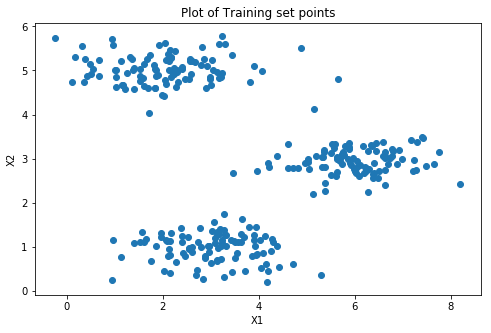

In [5]:
# data visualization
plt.figure(figsize=(8,5), facecolor='w')
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot of Training set points')

#### Finding Closest Centroids

$$C^{\left( i\right) }:=j \rightarrow \min \left\| x^{\left( i\right) }-\mu _{j}\right\| ^{2}$$
$$\left\| x^{\left( i\right) }-\mu _{j}\right\| ^{2} = \sum ^{m}_{i=1}\left( x^{\left( i\right) }-\mu _{j}\right) ^{2}$$

In [6]:
# Useful global variable
m = X.shape[0]  # number of examples

# Choose the number of centroids K = 3 intuitively from the above plot.
K = 3

# Select an initial set of centroids.
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [7]:
# calculate the squared distance (squared Euclidean distance)
def distSquared(point_1, point_2):
    dist = np.sum(np.square(point_2 - point_1))
    return (dist)

In [8]:
# find the closest centroids of each point (number of examples)
def findClosestCentroid(X, centroid):
    """
    This function takes the data matrix X and the locations of all centroids inside centroids and should output
    a one-dimensional array idx.
    """
    idx = np.zeros([X.shape[0], 1])  # initial index of cluster centroid closest to X(i), i = 1~m
    for i in range(X.shape[0]):
        dist = []
        for j in range(len(centroid)):  # compare this point with each centroid
            dist.append(distSquared(X[i], centroid[j]))
        idx[i] = np.argmin(dist)  # choose the min distance as index 
    return (idx+1)  # Since the index starts from 0 in Python, (result + 1) is correct.

In [9]:
# You should see the output [1 3 2] corresponding to the centroid assignments for the first 3 examples.
idx = findClosestCentroid(X, initial_centroids)
print(idx[:3].ravel())

[ 1.  3.  2.]


In [10]:
def plotData(X, centroid, index):
    """
    1. Assign every training example x(i) to its closest centroid, given the current positions of centroids.
    2. Then, color the data correctly.
    3. Note that c(i) corresponds to idx(i).
    """
    
    colors = ['goldenrod', 'lightgreen', 'fuchsia']
    X_cluster = []
    # separate all points into three clusters
    for j in range(K):
        X_cluster.append(np.array([X[i] for i in range(m) if index[i] == j+1]))
    
    # plot data points
    plt.figure(figsize=(8, 5), facecolor='w')
    for i in range(K):
        plt.scatter(X_cluster[i][:, 0], X_cluster[i][:, 1], color=colors[i], label='Cluster %i'%(i+1))

    # plot history of centroid movement
    if np.ndim(centroid) == 2:  # it means no iteration
        plt.scatter(centroid[:, 0], centroid[:, 1], marker='+', color='black', s=100, label='Centroids')
        plt.title('Plot of Training set points')
    else:
        tempx, tempy = [], []
        for c in centroid:  # take out x and y coordinate of each iteration
            tempx.append(c[:, 0])
            tempy.append(c[:, 1])
            
        for i in range(K):  # draw the centroid of all iteration of each clusters
            plt.plot(tempx, tempy, '+--', color='black', markersize=12)
        plt.title('Plot of Training set points (History of centroids movement)')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend(loc=4)

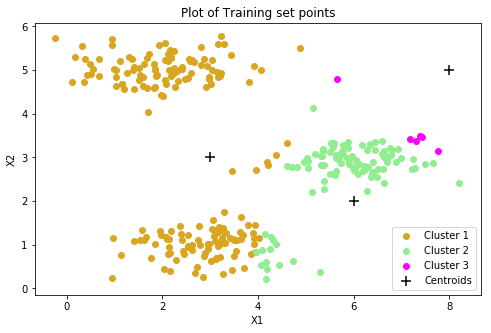

In [11]:
plotData(X, initial_centroids, idx)

#### Computing Centroid Means

$$
\mu _{k}:=\dfrac {1}{\left| C_{k}\right| }\sum _{i\in C_{k}}x^{\left( i\right) }$$

In [12]:
def computeCentroidMean(X, index, n_clusters):
    """
    Given assignments of every point to a centroid, the second phase of the algorithm recomputes,
    for each centroid, the mean of the points that were assigned to it.
    """
    X_cluster = []
    centroid = []
    for j in range(n_clusters):
        X_cluster.append(np.array([X[i] for i in range(X.shape[0]) if index[i] == j+1]))
    for i in range(n_clusters):
        centroid.append(np.mean(X_cluster[i], axis=0))
    return (centroid)

#### Run K-means

In [13]:
def runKMeans(X, centroid, n_clusters, n_iters):
    """
    Algorithm of K-Means step:
        1. Randomly initialize K cluster centroids.
        2. Cluster assignment step
        3. Move centroids.
    """
    centroid_history = []
    centroid_current = centroid
    for i in range(n_iters):
        centroid_history.append(centroid_current)
        idx = findClosestCentroid(X, centroid_current)
        centroid_current = computeCentroidMean(X, idx, n_clusters)
    return (idx, np.array(centroid_history))

In [14]:
idx_final, centroid_history = runKMeans(X, initial_centroids, n_clusters=K, n_iters=10)

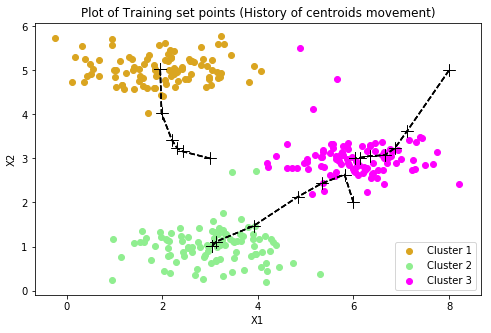

In [15]:
plotData(X, centroid_history, idx_final)

#### Random Initialization

In [16]:
def randomInitCentroid(X, n_clusters):
    """
    A good strategy for initializing the centroids is to select random examples from the training set.
    """
    init_centroids = []
    index = np.random.choice(X.shape[0], n_clusters)
    init_centroids.append(np.array([X[i] for i in index]))
    return (np.array(init_centroids).reshape(n_clusters, -1))

## sklearn K-Means

In [17]:
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

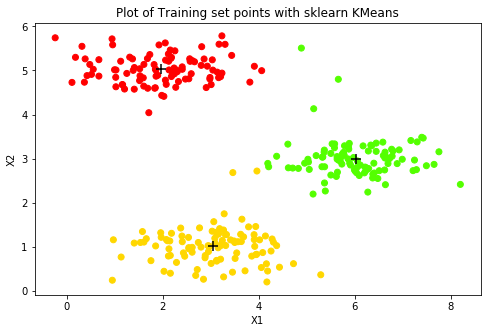

In [18]:
plt.figure(figsize=(8,5), facecolor='w')
plt.scatter(X[:, 0], X[:, 1], c=km.labels_, cmap=plt.cm.prism)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], marker = '+', color='black', s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plot of Training set points with sklearn KMeans')

## Image Compression with K-means

###### This creates a three-dimensional matrix A whose first two indices identify a pixel position, and whose last index represents red, green, or blue.

size A = (128, 128, 3)


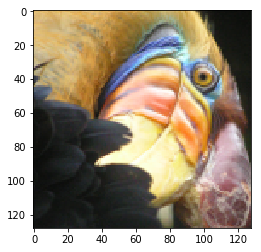

In [19]:
A = misc.imread('ex7/bird_small.png')  # read an image as an array
print('size A = {}'.format(A.shape))
plt.figure(facecolor='w')
image = plt.imshow(A)

###### In a coloured image, each pixel is of size 3 bytes (RGB), where each colour can have intensity values from 0 to 255.

In [20]:
# divide by 255 so that all values are in the range 0~1
A = A / 255

# reshapes the image to create a matrix of pixel colors
A = A.reshape(-1, 3)  # (128*128, 3)

In [21]:
# run K-Means with random initialization to represent this image with 16 colors
K_imgCompress = 16  # each centroid represents a color
idxImgCompress_final, centroidImgCompress_history = runKMeans(A, randomInitCentroid(A, n_clusters=K_imgCompress),
                                                              n_clusters=K_imgCompress, n_iters=10)

In [22]:
# use the clusters of K-Means to compress an image
A_compression = np.zeros_like(A)  # A_compression has the same size of A

# each row of A_compression matrix is the final centroid which indicates the final index 
for i in range(A_compression.shape[0]):
    A_compression[i] = centroidImgCompress_history[-1][int(idxImgCompress_final[i]) - 1] # -1 is for Python index

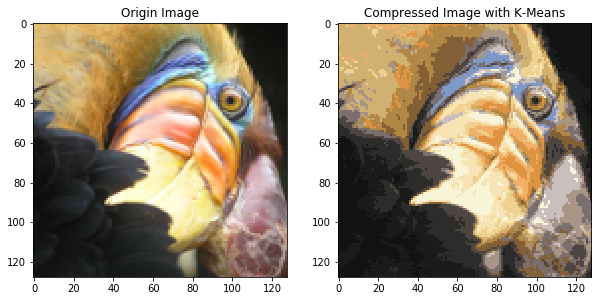

In [23]:
# comparison of origin image and compressed image 
plt.figure(figsize=(10,6), facecolor='w')
plt.subplot(1, 2, 1)
image_origin = plt.imshow(A.reshape(128, 128, 3))
plt.title('Origin Image')
plt.subplot(1, 2, 2)
image_compression = plt.imshow(A_compression.reshape(128, 128, 3))
plt.title('Compressed Image with K-Means')